<a href="https://colab.research.google.com/github/Yechiel82/LinkedList/blob/main/MATH1042_Contoh_Prosedur_Regresi_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MATH1042 Contoh Prosedur Regresi Linear

**Contoh Masalah:**

Diketahui beberapa data yang mengaitkan antara biaya iklan dengan penjualan sebagai berikut.

| **Adv Cost** | **Sales** |
|:------------:|:---------:|
|      37      |    477    |
|      45      |    524    |
|      37      |    513    |
|      48      |    586    |
|      33      |    404    |
|      23      |    286    |
|      31      |    414    |
|      34      |    457    |
|      27      |    364    |
|      41      |    435    |
|      42      |    451    |
|      48      |    549    |
|      25      |    249    |
|      26      |    315    |
|      45      |    537    |
|      44      |    521    |

**Tugas:**
* Membuat model regresi linear dengan parameter terbaik dengan menggunakan metode Kuadrat Terkecil.
* Membuat evaluasi atas model yang sudah dibuat.
* Membuat prediksi atas nilai regressor baru, dilengkapi dengan estimasi interval.

## Visualisasi Data

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy

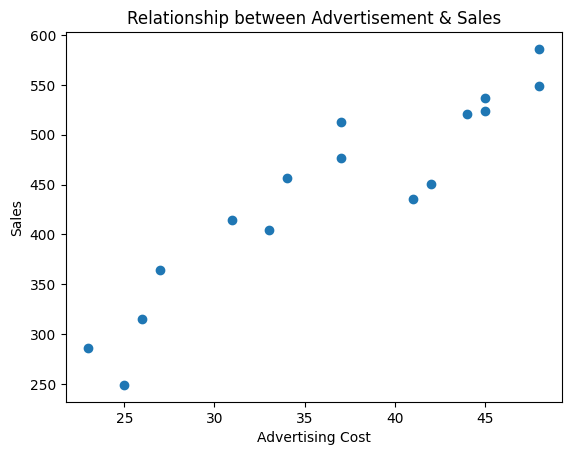

In [17]:
x = np.array([37, 45, 37, 48, 33, 23, 31, 34, 27, 41, 42, 48, 25, 26, 45, 44])
y = np.array([477, 524, 513, 586, 404, 286, 414, 457, 364, 435, 451, 549, 249, 315, 537, 521])

plt.scatter(x, y)
plt.xlabel("Advertising Cost")
plt.ylabel("Sales")
plt.title("Relationship between Advertisement & Sales")
plt.show()

## Menentukan Parameter terbaik dengan Least Square

Model Regresi Linear:
$$
\hat{y}^{(i)}= \beta_0 + \beta_1 x^{(i)}.
$$
Akan dicari nilai $\beta_0$ dan $\beta_1$ terbaik yang dapat mencocokkan model dengan data.

Ingat kembali beberapa definisi dan notasi berikut:

$$
\begin{align}
\bar{x} &= \dfrac{1}{n}\sum\limits_{i=1}^n x^{(i)}\\
\bar{y} &= \dfrac{1}{n}\sum\limits_{i=1}^n x^{(i)}\\
S_{xx} &= \sum\limits_{i=1}^n (x^{(i)}-\bar{x})^2\\
S_{xy} &= \sum\limits_{i=1}^n (x^{(i)}-\bar{x})(y^{(i)}-\bar{y})\\
S_{yy} &= \sum\limits_{i=1}^n (y^{(i)}-\bar{y})^2
\end{align}
$$

Maka, berdasarkan persamaan normal, nilai estimator $b_0$ dan $b_1$ terbaik untuk mengestimasi parameter $\beta_0$ dan $\beta_1$ dapat diperoleh melalui formula berikut.

$$
\begin{align}
b_1 &= \dfrac{S_{xy}}{S_{xx}}\\
b_0 &= \bar{y}-b_1\bar{x}\\
\end{align}
$$

In [36]:
# hitung semua nilai rata-rata dan simpangan

# i = len(x)
x_bar = np.sum(x)/len(x)
y_bar = np.sum(y)/len(y)
Sxx = ((x - x_bar) ** 2).sum()
Syy = ((y - y_bar) ** 2).sum()
Sxy = ((x - x_bar) * ( y - y_bar)).sum()
# print(x_bar,y_bar,Sxx,Syy,Sxy)
print(f"Rataan x \t: {x_bar: .3f}")
print(f"Rataan y \t: {y_bar: .3f}")
print(f"Simpangan xx \t: {Sxx: .3f}")
print(f"Simpangan xy \t: {Sxy: .3f}")
print(f"Simpangan yy \t: {Syy: .3f}")

Rataan x 	:  36.625
Rataan y 	:  442.625
Simpangan xx 	:  1079.750
Simpangan xy 	:  11702.750
Simpangan yy 	:  146815.750


In [37]:
# hitung nilai b0 dan b1
b1 = Sxy/Sxx
b0 = y_bar - b1 * x_bar

print(f"Nilai b0 \t: {b0: .3f}")
print(f"Nilai b1 \t: {b1: .3f}")

# should output:
# Nilai b0 	:  45.669
# Nilai b1 	:  10.838

Nilai b0 	:  45.669
Nilai b1 	:  10.838


In [ ]:
# hitung nilai b0 dan b1
b1 = 
b0 = 

print(f"Nilai b0 \t: {b0: .3f}")
print(f"Nilai b1 \t: {b1: .3f}")

# should output:
# Nilai b0 	:  45.669
# Nilai b1 	:  10.838

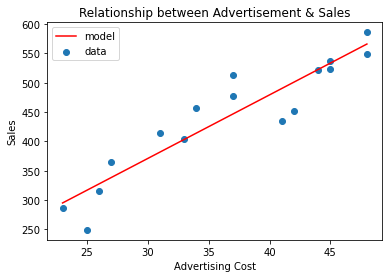

In [ ]:
# gambar model dalam bentuk persamaan garis

# x_line membangkitkan titik-titik diskrit di antara rentang data di list x
x_line = np.linspace(np.min(x), np.max(x), 100)
# y_line menunjukkan nilai y dari persamaan linear y = b0 + b1 * x
y_line = b0 + b1 * x_line

# plot garis
plt.plot(x_line, y_line, label = "model", c = "red")

# plot data
plt.scatter(x, y, label = "data")

plt.xlabel("Advertising Cost")
plt.ylabel("Sales")
plt.title("Relationship between Advertisement & Sales")
plt.legend()
plt.show()

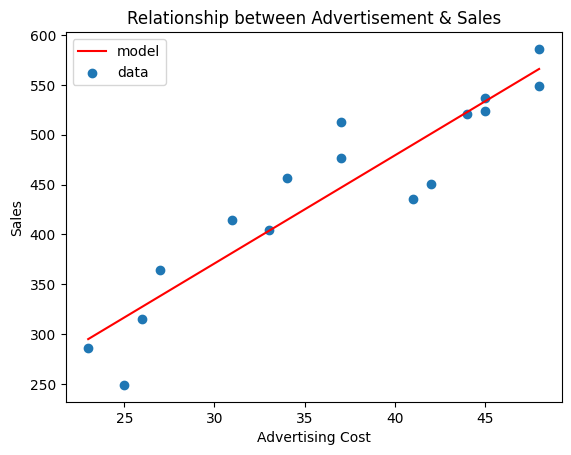

In [38]:
# gambar model dalam bentuk persamaan garis

# x_line membangkitkan titik-titik diskrit di antara rentang data di list x
x_line = np.linspace(np.min(x), np.max(x), 100)
# y_line menunjukkan nilai y dari persamaan linear y = b0 + b1 * x
y_line = b0 + b1 * x_line

# plot garis
plt.plot(x_line, y_line, label = "model", c = "red")

# plot data
plt.scatter(x, y, label = "data")

plt.xlabel("Advertising Cost")
plt.ylabel("Sales")
plt.title("Relationship between Advertisement & Sales")
plt.legend()
plt.show()

## Membuat evaluasi data

Untuk membuat evaluasi data, diperlukan untuk menghitung beberapa besaran berikut.

$$
\begin{align}
SSE=RSS &= \sum\limits_{i=1}^n (\hat{y}^{(i)}-y^{(i)})^2\\
SSR=ESS &= \sum\limits_{i=1}^n (\hat{y}^{(i)}-\bar{y})^2\\
SST=TSS &= \sum\limits_{i=1}^n (y^{(i)}-\bar{y})^2\\
\end{align}
$$

Ukuran evaluasi kesuksesan suatu model regresi linear dapat ditinjau melalui beberapa ukuran berikut:

$$
\begin{align}
\rho &= \dfrac{S_{xy}}{\sqrt{S_{xx}S_{yy}}}\\
R^2 &= 1-\dfrac{SSE}{SST}= 1-\dfrac{RSS}{TSS}\\
MSE &= \dfrac{1}{n-2}SSE = \dfrac{1}{n-2}\sum\limits_{i=1}^n (\hat{y}^{(i)}-y^{(i)})^2\\
RMSE &= \sqrt{\dfrac{1}{n-2}SSE} = \sqrt{\dfrac{1}{n-2}\sum\limits_{i=1}^n (\hat{y}^{(i)}-y^{(i)})^2}\\
\end{align}
$$



In [ ]:
# Hitung kuantitas-kuantitas awal yang diperlukan
# ro0 + ro1 * x
y_hat = 

SSE = 
SSR = 
SST = 

print(f"SSE \t: {SSE: .3f}")
print(f"SSR \t: {SSR: .3f}")
print(f"SST \t: {SST: .3f}")

SSE 	:  19976.799
SSR 	:  126838.951
SST 	:  146815.750


In [ ]:
# Hitung kuantitas-kuantitas awal yang diperlukan

y_hat = 

SSE = 
SSR = 
SST = 

print(f"SSE \t: {SSE: .3f}")
print(f"SSR \t: {SSR: .3f}")
print(f"SST \t: {SST: .3f}")

In [ ]:
# Hitung metrik evaluasi model regresi linear

rho = 
R_square = 
MSE = 
RMSE = 

print(f"rho \t: {rho: .3f}")
print(f"R2 \t: {R_square: .3f}")
print(f"MSE \t: {MSE: .3f}")
print(f"RMSE \t: {RMSE: .3f}")

rho 	:  0.929
R2 	:  0.864
MSE 	:  1426.914
RMSE 	:  37.775


## Membuat Prediksi atas Data Regressor Baru

**Masalah:** Berapa perkiraan sales yang diperoleh jika menggunakan biaya iklan sebesar $75?

### Estimasi Titik

Misalkan $\tilde{x}$ merupakan suatu titik regressor baru yang hendak diprediksi nilai responsenya.

Estimasi titik prediksi dilakukan sesederhana $\tilde{y} = b_0 + b_1\tilde{x}$.

In [ ]:
# inputkan nilai regressor yang ingin diprediksi responnya.
x_predict = 75

# hitung prediksi respon
y_predict = 

print(f"x_predict \t: {x_predict: .3f}")
print(f"y_predict \t: {y_predict: .3f}")

x_predict 	:  75.000
y_predict 	:  858.548


### Estimasi Interval

Misalkan $\tilde{x}$ merupakan suatu titik regressor baru yang hendak diprediksi nilai responsenya.

Estimasi interval prediksi dilakukan dengan mempertimbangkan persamaan $\hat{y} = b_0 + b_1x + \varepsilon$ dengan $\varepsilon\sim N(0, \sigma)$.

Parameter $\sigma$ dapat diestimasi melalui nilai RMSE.

In [ ]:
from scipy.stats import norm

alpha = 0.05

# tentukan nilai sigma_alpha sehingga P(-sigma_alpha < sigma < sigma_alpha) = 1 - alpha
sigma_alpha = 

# tentukan batas bawah dan atas interval hasil prediksi
y_pred_low = y_predict - sigma_alpha
y_pred_up = y_predict + sigma_alpha

print(f"x_predict \t: {x_predict: .3f}")
print(f"\nWith confidence level {1-alpha:.2%},")
print(f"y_predict \t: {y_pred_low: .3f} - {y_pred_up: .3f}")

x_predict 	:  75.000

With confidence level 95.00%,
y_predict 	:  784.511 -  932.585


### Estimasi Interval untuk seluruh nilai data

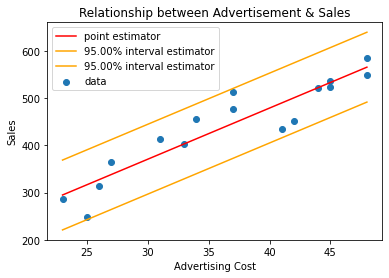

In [ ]:
# gambar batas interval dalam bentuk persamaan garis

# x_line membangkitkan titik-titik diskrit di antara rentang data di list x
x_line = np.linspace(np.min(x), np.max(x), 100)

# prediksi titik
y_line = b0 + b1 * x_line

# prediksi interval
y_low = y_line - sigma_alpha
y_up = y_line + sigma_alpha


# plot prediksi titik
plt.plot(x_line, y_line, label = "point estimator", c = "red")

# plot prediksi interval
plt.plot(x_line, y_low, label = f"{1-alpha:.2%} interval estimator", c = "orange")
plt.plot(x_line, y_up, label = f"{1-alpha:.2%} interval estimator", c = "orange")


# plot data
plt.scatter(x, y, label = "data")

plt.xlabel("Advertising Cost")
plt.ylabel("Sales")
plt.title("Relationship between Advertisement & Sales")
plt.legend()
plt.show()